In [ ]:
import numpy as np
import pandas as pd
import hoi
from hoi.plot import plot_landscape
from hoi.utils import get_nbest_mult
import matplotlib.pyplot as plt


c:\Users\matte\anaconda3\envs\base_mmm\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Here I generate random data to give an idea about how does the toolbox works

n_times = 100
n_regions = 5
n_twindows = 30

data=np.random.rand(n_times, n_regions, n_twindows)

In [ ]:
model=hoi.metrics.Oinfo(data.astype(float))
oinfo=model.fit(minsize=3,maxsize=3, method="gc") 

# for computation only at order k, you have to write minsize=maxsize=k  
# method = 'gc' if the data is continuous and you want to use gaussian copula

    Copnorm and demean the data


Get list of multiplets


In [ ]:
# Here for binned data

data_bin = np.random.randint(0, 2, size=data.shape)
model_bin=hoi.metrics.Oinfo(data_bin.astype(int))
oinfo_bin=model_bin.fit(minsize=3,maxsize=3, method="binning")


Get list of multiplets


In [ ]:
# An estimator that is performing the binarization and than the computation of O-information is the histogram estimator
# In the documentation online and in the examples, you can find more information about the different estimators available and the differences between them.

model_est=hoi.metrics.Oinfo(data.astype(float))
oinfo_est=model_est.fit(minsize=3,maxsize=3, method="histogram")


Get list of multiplets


In [ ]:
# Has you might see the results are multiplets x twindows

print(oinfo.shape)
print(oinfo_bin.shape)
print(oinfo_est.shape)

(10, 30)
(10, 30)
(10, 30)


<Axes: xlabel='Order', ylabel='O-Information [Bits]'>

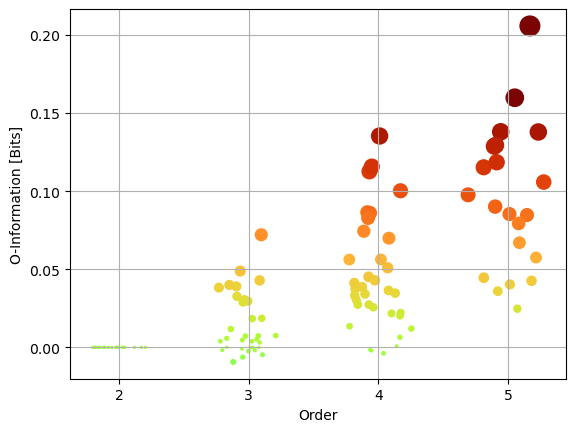

In [12]:
plot_landscape(
    oinfo,
    model,
    kind="scatter",
    undersampling=False,
    plt_kwargs=dict(cmap="turbo"),
)

In [13]:
df=get_nbest_mult(oinfo, model, minsize=3, maxsize=3)

In [14]:
df

,index,order,hoi,multiplet
0,37,3,0.072095,"[1, 2, 4]"
1,23,3,0.048846,"[0, 1, 4]"
2,27,3,0.042847,"[0, 2, 4]"
3,50,3,0.039967,"[2, 4, 6]"
4,34,3,0.039059,"[0, 4, 6]"
5,36,3,-0.002275,"[1, 2, 3]"
6,26,3,-0.002513,"[0, 2, 3]"
7,38,3,-0.004722,"[1, 2, 5]"
8,28,3,-0.006248,"[0, 2, 5]"
9,49,3,-0.009333,"[2, 4, 5]"


Redundancy hypergraph at order 3

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x15cfdedaad0>,
  <matplotlib.collections.PatchCollection at 0x15cf58dbcb0>))

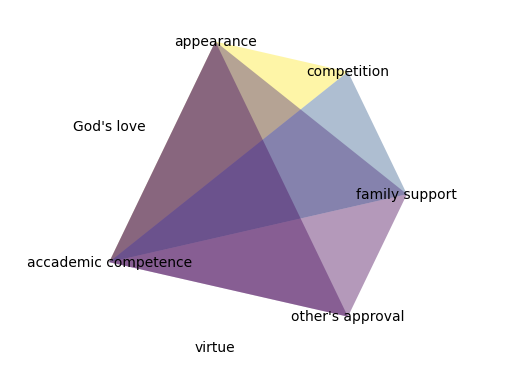

In [9]:
hype=xgi.Hypergraph()

#Here we separate the synergistic and redundant interactions
index_pos=np.where(df['hoi']>0)[0]
index_neg=np.where(df['hoi']<0)[0]
hype.add_nodes_from(np.arange(0,7))
hype.add_edges_from(df['multiplet'][index_pos][::-1])

dict_node_labels={}
for i,l in enumerate(data.columns):
    dict_node_labels[i]=l

xgi.draw(hype, pos=xgi.drawing.layout.circular_layout(hype), node_labels=dict_node_labels, edge_fc=df['hoi'][index_pos][::-1], node_size=0, edge_fc_cmap='viridis')

Synergy hypergraph at order 3

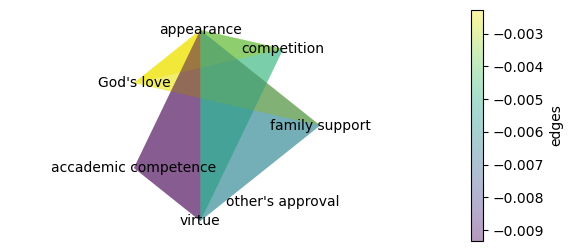

In [10]:
hype=xgi.Hypergraph()

#Here we separate the synergistic and redundant interactions
index_pos=np.where(df['hoi']>0)[0]
index_neg=np.where(df['hoi']<0)[0]
hype.add_nodes_from(np.arange(0,7))
hype.add_edges_from(df['multiplet'][index_neg][::-1])

dict_node_labels={}
for i,l in enumerate(data.columns):
    dict_node_labels[i]=l

plt.figure(figsize=(7,3))
ax, hyperedge_collection = xgi.draw_hyperedges(hype, 
                                  pos=xgi.drawing.layout.circular_layout(hype), 
                                  edge_fc=df['hoi'][index_neg][::-1], 
                                  node_size=0, 
                                  edge_fc_cmap='viridis')
xgi.draw(hype, 
         pos=xgi.drawing.layout.circular_layout(hype), 
         edge_fc=df['hoi'][index_neg][::-1], 
         node_labels=dict_node_labels,
         node_size=0,
         edge_fc_cmap='viridis')

plt.colorbar(hyperedge_collection[1], label="edges", ax=ax)